<div style="text-align: center">
  <h2>Projeto 4 - Álgebra Linear Numérica</h2>
  
  <p><strong>Roger Vinícius Pereira Augusto</strong><br>
  Matrícula: 241708020</p>

  <p><strong>Vinício Vasconcelos Muniz Deusdará</strong><br>
  Matrícula: 231708029</p>
</div>
<hr>

**Importações necessárias**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<hr>

**Questão 1. Matrizes Gaussianas.** Uma matriz gaussiana tem todas as entradas $A_{ij}$ independentes e distribuídas segundo uma normal padrão, ou seja, $A_{ij} \sim \mathcal{N} (0, 1)$

a) **Distribuição de normas.** Faça um histograma da norma-$2$ das colunas de uma matriz gaussiana $A$, $ m \times n $. Use vários valores de $m$, e comente o que você observa.

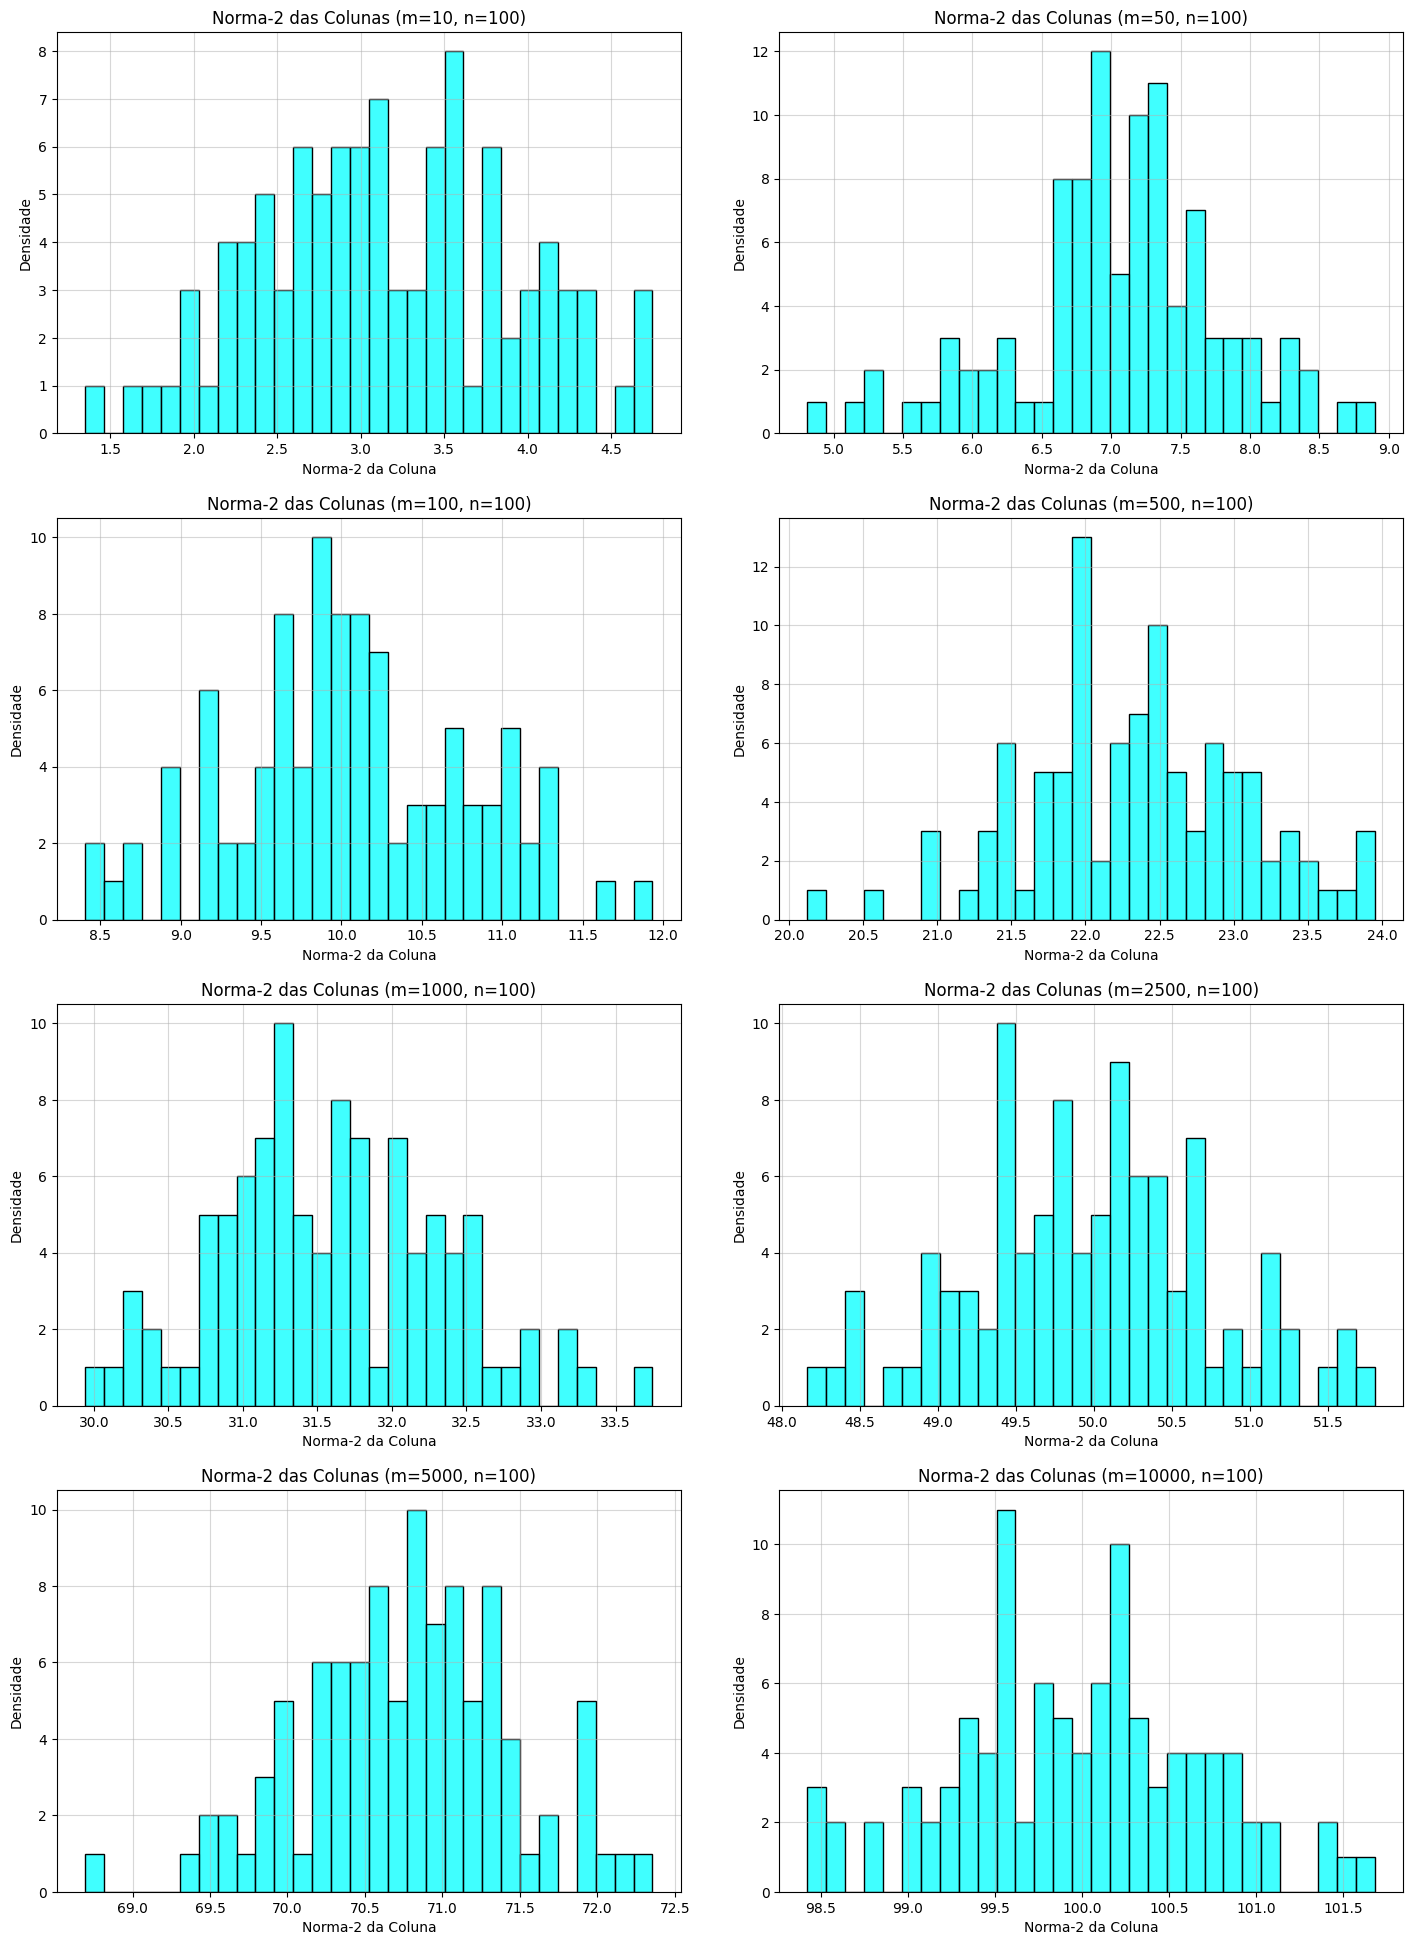

In [2]:
def plot_2_norm_histogram(m_values: list, n: int):
    """Gera matrizes gaussianas A (m x n) para diferentes valores de m,
    calcula a norma-2 de suas colunas e plota histogramas em subplots.

    Args:
        m_values (list): Lista contendo todos os valores de m
        n (int): Valor de n
    """
    # Definir o formato dos subplots
    num_plots = len(m_values)
    cols = 2
    rows = (num_plots + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    fig.tight_layout(pad=4)
    
    axes = axes.ravel()
    
    # Iterar sobre os valores de m
    for idx, m in enumerate(m_values):

        # Gerar matriz gaussiana A (m x n)
        A = np.random.randn(m, n)
        
        # Calcular norma de cada coluna
        column_norms = np.linalg.norm(A, axis=0)
        
        # Plotar histograma
        sns.histplot(column_norms, bins=30, color="aqua", ax=axes[idx])
        axes[idx].set_title(f"Norma-2 das Colunas (m={m}, n={n})")
        axes[idx].set_xlabel("Norma-2 da Coluna")
        axes[idx].set_ylabel("Densidade")
        axes[idx].grid(alpha=0.5)
    
    plt.show()

# Valores de m a serem testados
m_values = [10, 50, 100, 500, 1000, 2500, 5000, 10000]
plot_2_norm_histogram(m_values, n=100)

**RESPOSTA:** Podemos perceber que, conforme $m$ aumenta, a norma-2 das colunas de $A$ cresce conjuntamente. Isso é esperado e fica claro quando levamos em consideração a definição da norma-2 de uma coluna $a_j$:

$$
\|a_j\|_2 = \sqrt{a_{1j}^2 + a_{2j}^2 + \cdots + a_{mj}^2}
$$

Onde $a_{ij}$ são variáveis aleatórias independentes e identicamente distribuídas seguindo uma distribuição normal padrão, ou seja, $a_{ij} \sim \mathcal{N}(0, 1)$.

Para entender o comportamento do crescimento, podemos analisar o valor esperado do quadrado da norma-2 de uma coluna. Como cada $a_{ij}$ é uma variável aleatória $\mathcal{N} \sim (0,1)$, temos que o valor esperado do quadrado de $a_{ij}$ é igual à variância de $a_{ij}$ somado ao quadrado do valor esperado de $a_{ij}$ que é o mesmo que $1 + 0^2 = 1$. 

Assim, o valor esperado do quadrado da norma-2 é:

$$
\mathbb{E}[\|a_{j}\|_2^2] = m \cdot \mathbb{E}[a_{ij}^2] = m \cdot 1 = m 
$$

Isso implica que o valor esperado da norma-2 é aproximadamente $\sqrt{m}$

Portanto, o crescimento das normas é diretamente proporcional à raiz quadrada de $m$.


**CONCLUSÃO**:

À medida que o número de linhas da matriz aumenta, mais termos são somados dentro da raiz quadrada na definição da norma-2, o que naturalmente leva a um aumento no valor total da norma. A distribuição das normas também se torna mais concentrada em torno de $\sqrt{m}$  devido à Lei dos Grandes Números, explicando por que os histogramas se tornam mais estreitos e centrados em valores maiores conforme 'm' cresce.

<hr>


b) **Produtos internos.** Agora, fixe $m = 100$ e faça o histograma do produto interno $ \left< A_i, A_j \right>$ entre colunas de uma matriz gaussiana $A$. Exclua os casos $i = j$, e use $n = 100$, $200$, $500$ e $1000$. O que acontece? Qual parece ser a distribuição para $n \rightarrow \infty$?

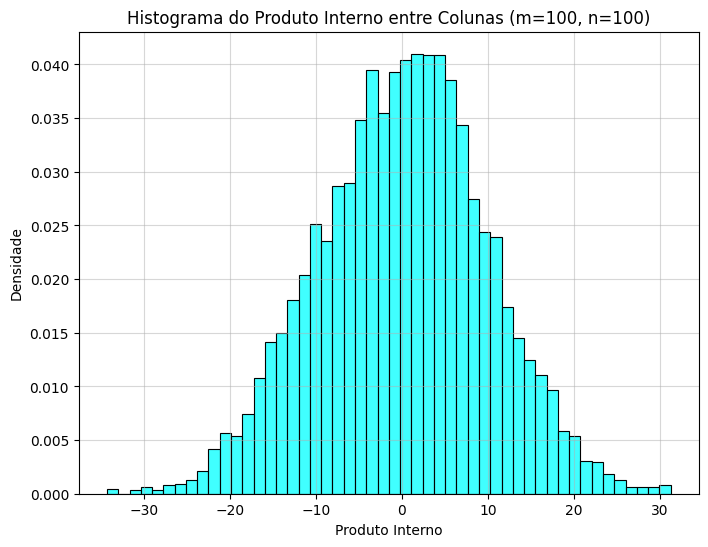

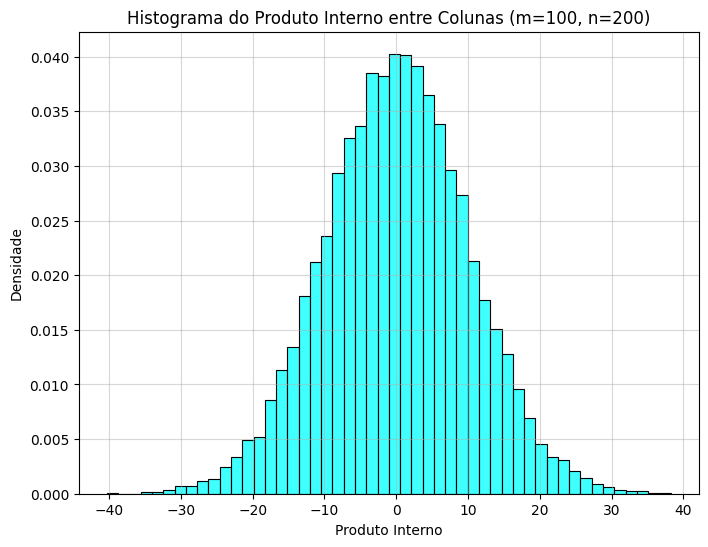

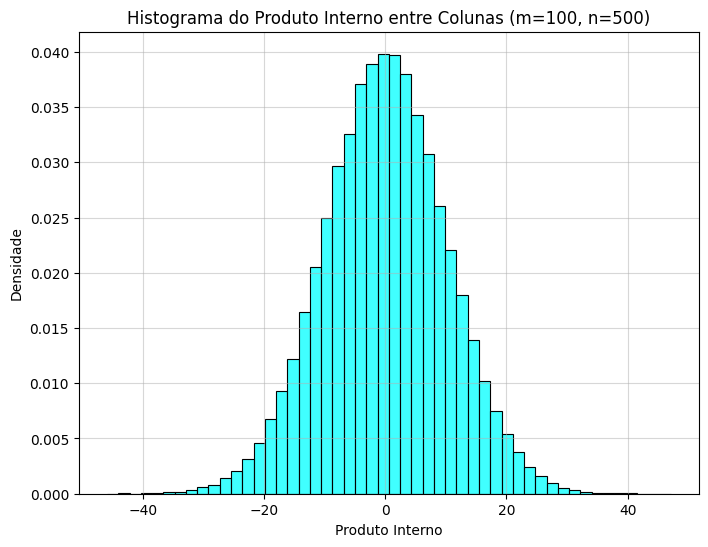

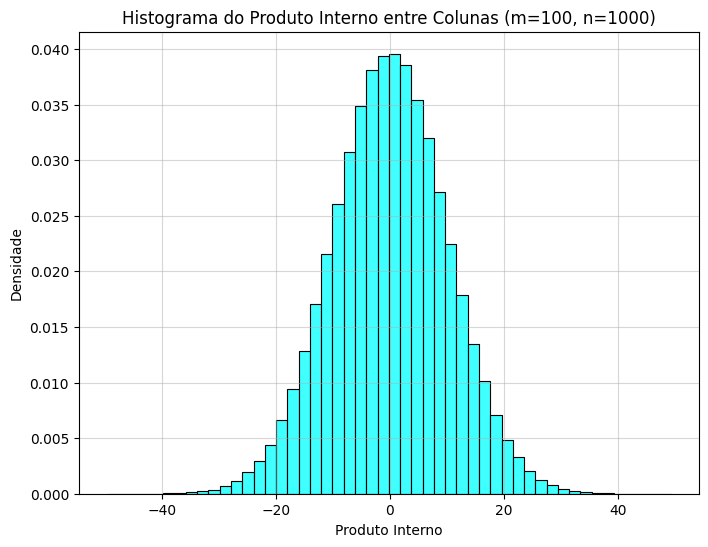

In [3]:
def plot_inner_product_histogram(m=100, n_values=[100, 200, 500, 1000]):
    """Gera matrizes gaussianas A (m x n) com m=100 para diferentes valores de n,
    calcula o produto interno entre colunas distintas e plota histogramas.

    Args:
        m (int, optional): Valor de m fixado. Defaults to 100.
        n_values (list, optional): Lista contendo os valores de n. Defaults to [100, 200, 500, 1000].
    """
    for n in n_values:
        # Gerar matriz gaussiana A (m x n)
        A = np.random.randn(m, n)

        # Calcular todos os produtos internos entre as colunas usando multiplicação de matrizes
        inner_products_matrix = A.T @ A

        # Obtém os índices da parte superior triangular da matriz (excluindo valores duplicados e i=j)
        upper_triangle_indices = np.triu_indices(n, k=1)
        
        # Seleciona apenas os produtos internos correspondentes à parte superior triangular da matriz
        inner_products = inner_products_matrix[upper_triangle_indices]

        plt.figure(figsize=(8, 6))
        sns.histplot(inner_products, bins=50, color='aqua', stat='density')
        plt.title(f'Histograma do Produto Interno entre Colunas (m={m}, n={n})')
        plt.xlabel('Produto Interno')
        plt.ylabel('Densidade')
        plt.grid(alpha=0.5)
        plt.show()

    

plot_inner_product_histogram()


**RESPOSTA:** 

Quando fixamos $m=100$ e analisamos o produto interno entre colunas distintas de uma matriz gaussiana $A$ com entradas independentes e identicamente distribuídas de uma distribuição $\mathcal{N} \sim (0,1)$, observamos um comportamento estatístico ao variar o número de colunas $n$. Para cada valor de $n$ ($100$, $200$, $500$ e $1000$), calculamos todos os produtos internos entre pares de colunas distintas e plotamos seus histogramas.

À medida que $n$ aumenta, o número de produtos internos cresce rapidamente, seguindo a relação $\frac{n(n−1)}{2}$. Por exemplo, para $n=100$, temos cerca de $4950$ pares, enquanto para $n=1000$, esse número salta para aproximadamente $499500$ pares. Esse aumento no volume de dados faz com que os histogramas se tornem cada vez mais suaves e bem definidos, refletindo com maior precisão a distribuição normal subjacente.

A distribuição dos produtos internos $\left<A_i, A_j\right>$ possui média zero, pois as colunas são independentes e suas entradas têm média zero. Além disso, a variância é constante e igual a $m=100$, resultando em um desvio padrão de $10$. Isso significa que a dispersão dos dados nos histogramas não muda com $n$, e o que observamos é apenas um refinamento na forma da distribuição devido ao maior número de amostras.

Para $n$ tendendo a $\infty$, o histograma converge para uma distribuição normal $\mathcal{N} \sim (0,100)$. Essa convergência é garantida pelo Teorema Central do Limite, já que cada produto interno é uma soma de $m=100$ produtos de variáveis normais padrão independentes. Embora os termos individuais não sejam normais, sua soma se aproxima de uma normal à medida que $m$ é grande.


**CONCLUSÃO**:

Em resumo, ao aumentar $n$, os histogramas se tornam mais suaves e simétricos, aproximando-se de uma distribuição normal com média zero e desvio padrão $10$. A convergência para $\mathcal{N} \sim (0,100)$ é cada vez mais evidente quanto mais aumentamos o valor de $n$, pois o maior número de amostras revela com mais clareza a verdadeira natureza estatística dos produtos internos entre colunas da matriz gaussiana. Com o crescimento de $n$, percebemos que a distribuição se assemelha cada vez mais a uma normal centrada em $0$, o que se dá tanto pelo Teorema Central do Limite quanto pela Lei dos Grandes Números: à medida que n aumenta, temos mais pares de colunas para calcular o produto interno, e a média desses produtos (que é zero) se torna cada vez mais precisa.

<hr>

c) **A distribuição do máximo.** Queremos ver quão “não ortogonal” é a matriz $A$. Para isso, vamos estudar o máximo de $\dfrac{|\left<A_i, A_j \right>|}{\|A_i\|\|A_j\|}$ entre colunas distintas de uma matriz gaussiana $A$. Para isto, gere $K = 1000$ matrizes gaussianas $A_k$ de ordem $100 \times 300$, calcule o máximo indicado acima, e faça um histograma dos $K$ valores obtidos.

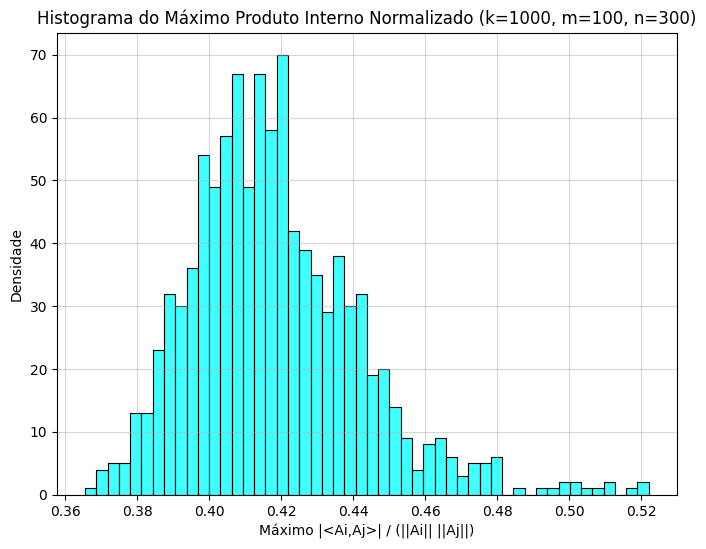

In [ ]:
def max_cosine(m=100, n=300) -> float:
    """Gera uma matriz gaussiana A (m x n), calcula o máximo de |<Ai,Aj>| / (||Ai|| ||Aj||)
    entre colunas distintas.

    Args:
        m (int, optional): Número de linhas da matriz. Defaults to 100.
        n (int, optional): Número de colunas da matriz. Defaults to 300.

    Returns:
        float: Maior valor  de cosseno encontrado
    """
    A = np.random.randn(m, n)

    # Cacular as normas e normas inversas das colunas de A
    norms = np.linalg.norm(A, axis=0)
    inv_norms = 1 / norms

    # Produto interno como multiplicação de A^T por A
    inner_products = A.T @ A

    # Remover diagonal (i=j)
    np.fill_diagonal(inner_products, 0)

    # Calcular cossenos
    cosines = np.abs(inner_products * inv_norms * inv_norms[:, np.newaxis])

    # Retornar cosseno máximo
    return np.max(cosines)

def plot_cosines(k=1000, m=100, n=300):
    """Gera K matrizes gaussianas, calcula o máximo de |<Ai,Aj>| / (||Ai|| ||Aj||)
    para cada uma, e plota um histograma dos K valores obtidos.

    Args:
        k (int, optional): Número de matrizes gaussianas. Defaults to 1000.
        m (int, optional): Número de linhas das matrizes. Defaults to 100.
        n (int, optional): Número de colunas das matrizes. Defaults to 300.
    """

    max_values = []
    for _ in range(k):
        max_values.append(max_cosine(m, n))

    plt.figure(figsize=(8, 6))
    sns.histplot(max_values, bins=50, color='aqua')
    plt.title(f'Histograma do Máximo Produto Interno Normalizado (k={k}, m={m}, n={n})')
    plt.xlabel('Máximo |<Ai,Aj>| / (||Ai|| ||Aj||)')
    plt.ylabel('Densidade')
    plt.grid(alpha=0.5)
    plt.show()

plot_cosines()

**RESPOSTA:** O valor do cosseno de um ângulo (dado por $\frac{|\left<A_i, A_J\right>|}{\|A_i\|\|A_j\|}$) indica o qual ortogonal dois vetores são. Valores próximos de zero indicam que as colunas são quase ortogonais e vice-versa. O histograma mostra que, mesmo para matrizes gaussianas onde as colunas são geradas independentemente, existe uma probabilidade de encontrar colunas que não são perfeitamente ortogonais, e o máximo desses valores é relativamente alto (em torno de $0.4$ e $0.5$).

<hr>

d) **Complexidade computacional.** Qual a complexidade de calcular o máximo acima? Qual valor de $K$ você acha que seria bom para ter uma boa estimativa do máximo esperado?

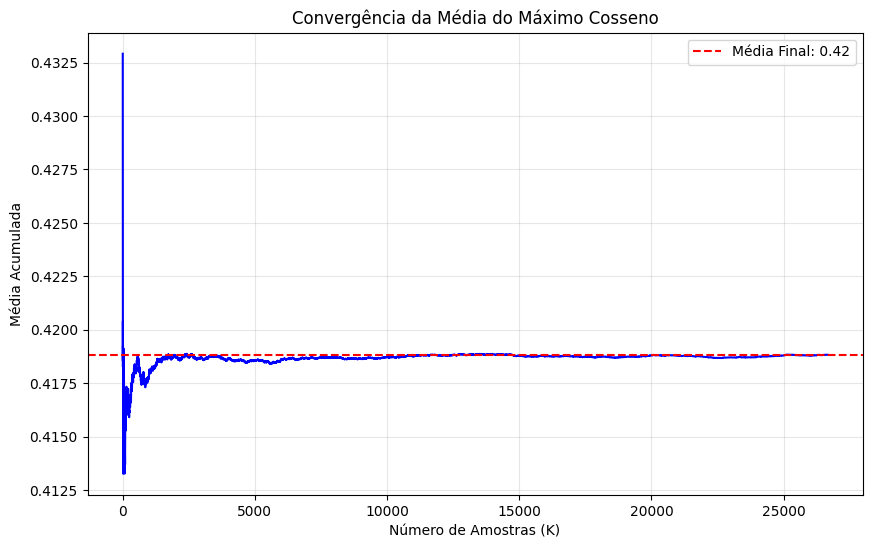

(26650, 0.41883817887567787)

In [ ]:
def find_optimal_k(m=100, n=300, epsilon=1e-6, max_k=50000):
    """Encontra o K ótimo baseado na convergência da média.

    Args:
        m (int, optional): Número de linhas da matriz. Defaults to 100.
        n (int, optional): Número de colunas da matriz. Defaults to 300.
        epsilon (float, optional): Erro para verificar convergência. Defaults to 0.005.
        max_k (int, optional): Número máximo de matrizes. Defaults to 5000.

    Returns:
        tuple: Valor de K para o qual a média converge (dado um erro) e média do cosseno máximo
    """
    max_values = []
    cumulative_mean = []
    k = 0
    
    # Loop até k se estabilizar ou atingir o número máximo
    while k < max_k:
        
        # Gerar uma nova amostra
        new_max = max_cosine(m, n)
        max_values.append(new_max)
        k = len(max_values)
        
        # Atualizar a média acumulada
        current_mean = np.mean(max_values)
        cumulative_mean.append(current_mean)
        
        # Verificar convergência a cada 50 amostras (p/ eficiência)
        if k % 50 == 0:

            # Separar os valores pela metade e comparar a mudança relativa da metade inicial com a final
            half_k = max(k // 2, 1)
            mean_half = np.mean(max_values[:half_k])
            rel_change = abs(current_mean - mean_half) / mean_half
            
            if rel_change < epsilon:
                break
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, k+1), cumulative_mean, 'b-')
    plt.axhline(y=current_mean, color='r', linestyle='--', label=f'Média Final: {current_mean:.2f}')
    plt.title('Convergência da Média do Máximo Cosseno')
    plt.xlabel('Número de Amostras (K)')
    plt.ylabel('Média Acumulada')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
    
    return k, current_mean

find_optimal_k()

**RESPOSTA 1:**

1. Gerar uma matriz $A$ $m \times n$, tem complexidade $O(mn)$
2. Calcular as normas tem complexidade $O(mn)$
   - Cada norma envolve $m$ somas e uma raiz quadrada
3. Calcular o inverso das normas tem complexidade $O(n)$
4. Realizar produtos internos tem complexidade $O(mn^2)$
   - Feito por $A^T A$
5. Preencher as diagonais com zeros tem complexidade $O(n)$
6. Calcular os cossenos tem complexidade $O(n^2)$
7. Encontrar o maior valor na matriz de cossenos tem complexidade $O(n^2)$

Pela análise assintótica, temos que a complexidade do algoritmo é de $O(mn^2)$.


**RESPOSTA 2:** Para estimar o valor esperado do máximo cosseno entre pares de colunas de uma matriz gaussiana, repetimos o experimento $K$ vezes (gerando novas matrizes a cada vez) e tomamos a média dos máximos observados. À medida que $K$ aumenta, a média dos máximos converge. Para definir um valor "suficientemente bom" de $K$, analisamos a variação relativa da média acumulada, e interrompemos quando a mudança entre iterações consecutivas cai abaixo de um limiar $\epsilon = 10^{-6}$. Portanto, escolhemos um valor de $K$ tal que:

$$
\left| \dfrac{\mu_{K} - \mu_{K/2}}{\mu_{K}} \right| < \epsilon
$$

em que $\mu_K$ é a média dos cossenos máximos entre as $K$ primeiras matrizes.

<hr>

e) **A distribuição do máximo, parte 2.** Escolha valores de $K$ correspondentes e faça histogramas e comente os resultados para os seguintes pares de $(m, n)$: $(100, 100)$, $(100, 300)$ $(200, 200)$, $(200, 600)$, $(500, 500)$, $(500, 1500)$, $(1000, 1000)$, $(1000, 3000)$.

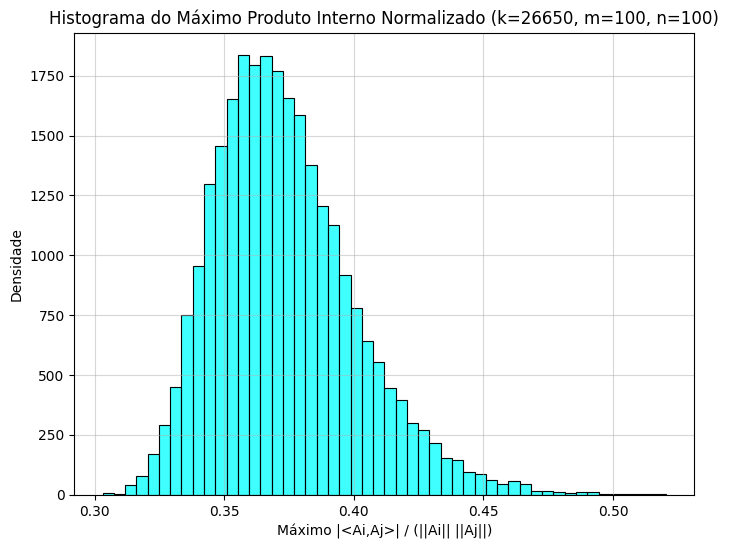

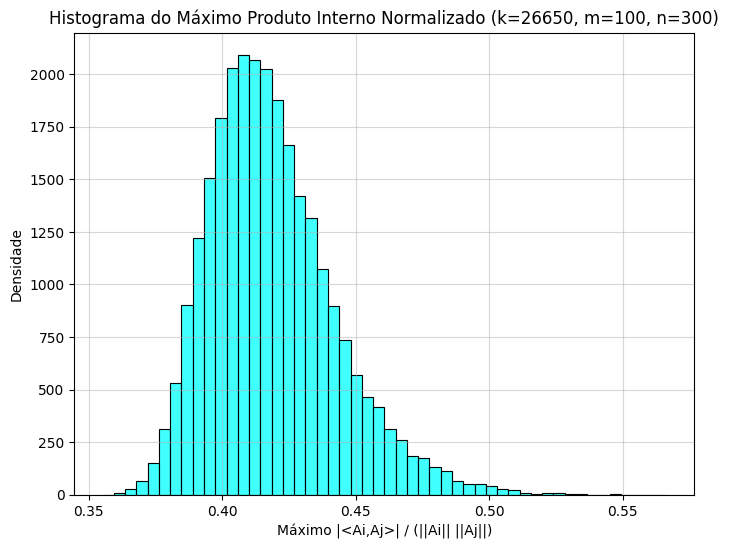

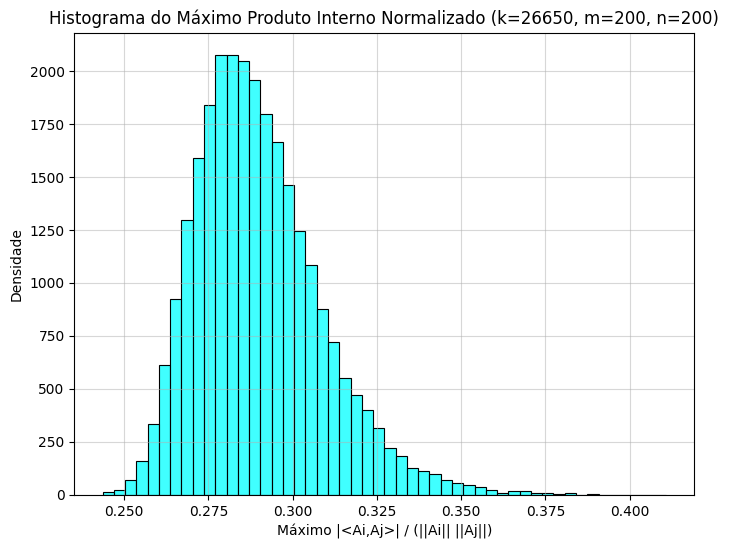

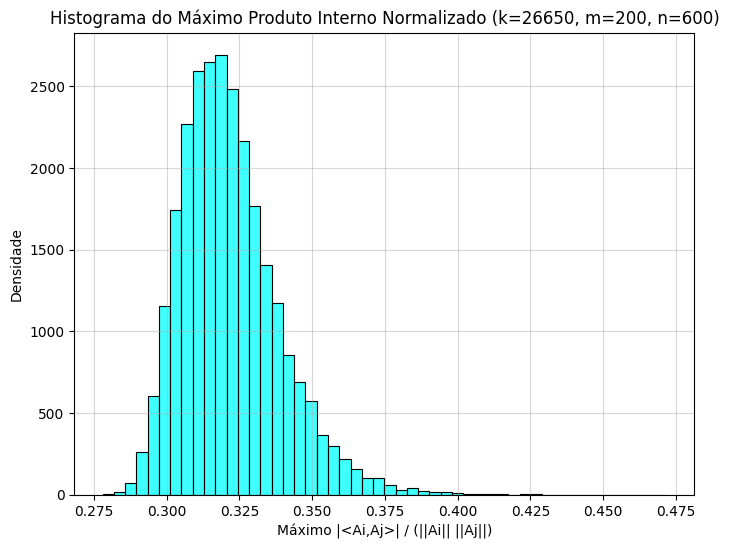

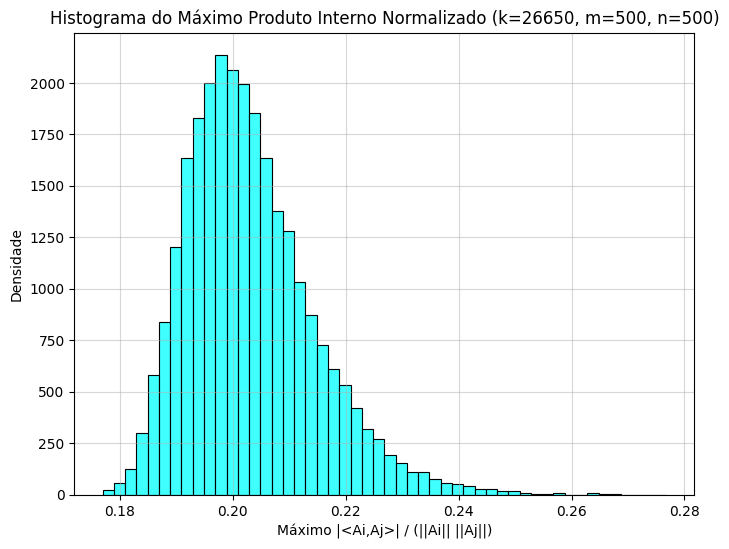

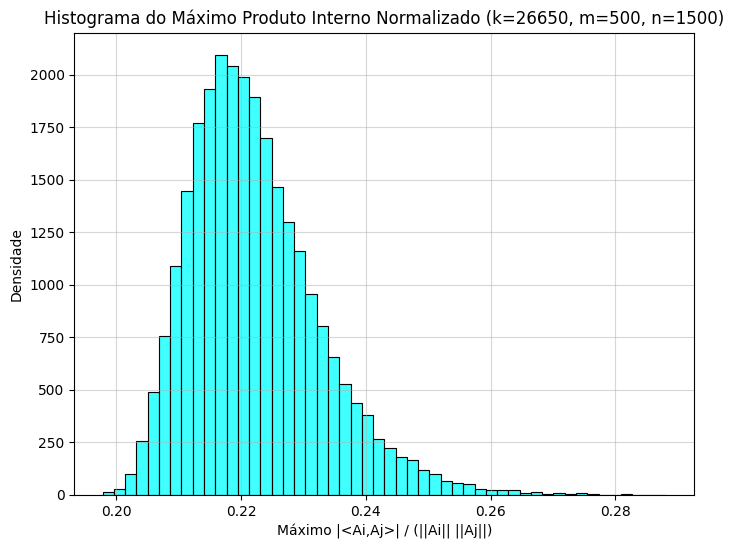

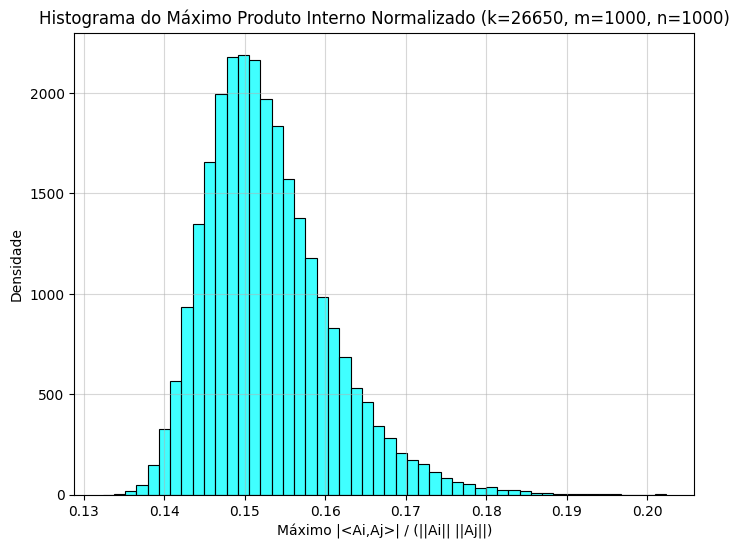

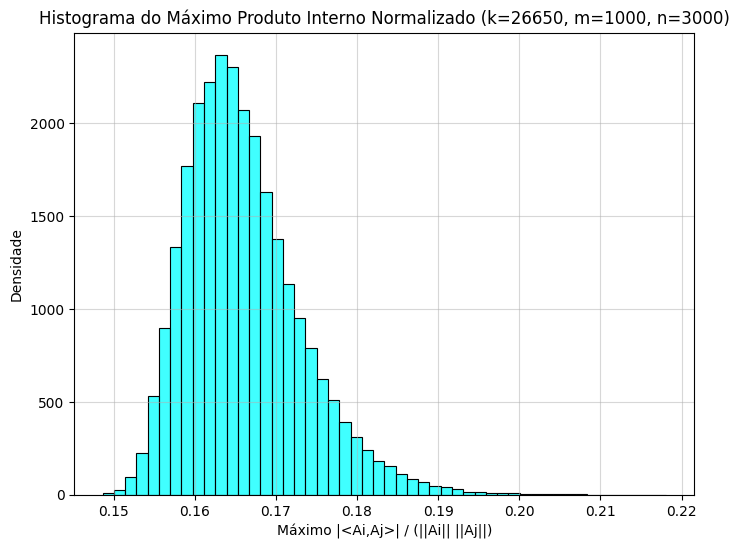

In [20]:
m_n_values = [
    (100, 100), (100, 300),
    (200, 200), (200, 600),
    (500, 500), (500, 1500),
    (1000, 1000), (1000, 3000)
]

for pair in m_n_values:
    plot_cosines(m=pair[0], n=pair[1], k=26650)

**RESPOSTA:** Percebemos que, ao aumentar o número de linhas, os produtos internos se deslocam para a esquerda, tornando as matrizes "mais ortogonais", enquanto o oposto acontece para um aumento nas colunas. Por outro lado, fica visível uma convergência para valores entre $0.15$ e $0.16$ com valores grandes de $m$ e $n$, demonstrando uma tendência da distribuição. Durante a execução do código, fica clara a complexidade de $O(mn^2)$ do código se materializando, uma vez que pares com $m < n$ levam muito mais tempo a serem rodados. 